This notebook contains two chapters, chapter one imports CSV's, merges the data, and ends in a display of bar plots. 
Chapter two, calls an API, cleans the data, concluding with a comparison.

In [1]:
#importing libraries
import pandas as pd

In [2]:
import matplotlib

In [3]:
%matplotlib inline

In [4]:
#from matplotlib import pyplot as plt

In [5]:
import numpy as np

In [6]:
#importing csv
df1 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/calories%20in%20energy%20drinks.csv")

In [7]:
df2 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/calories%20in%20soda%20-%20Sheet1.csv")

In [8]:
df3 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/sugar%20in%20energy%20drinks.csv")

In [9]:
df4 = pd.read_csv(r"https://raw.githubusercontent.com/CarlosSandoval0/sugarproject/main/calories%20in%20energy%20drinks.csv")

In [ ]:
#replace to run locally
#"C:\Users\sando\Documents\sugarproject\sugar in soda.csv
#"C:\Users\sando\Documents\sugarproject\calories in soda - Sheet1.csv
#"C:\Users\sando\Documents\sugarproject\sugar in energy drinks.csv
#"C:\Users\sando\Documents\sugarproject\calories in energy drinks.csv")

## Sodas

In [10]:
df1

,drink 20oz,sugar amount in g,caffeine in mg,sodium in mg
0,coca-cola,65,57,75
1,dr pepper,64,68,100
2,pepsi,69,63,55
3,sprite,64,0,110
4,mtn dew,77,91,105
5,fanta,73,0,90
6,a&w root beer,72,0,135
7,canada dry,59,0,80
8,orange crush,71,0,120


In [11]:
df2

,drink 20oz,calories
0,coca-cola,240
1,dr pepper,250
2,pepsi,250
3,sprite,230
4,mtn dew,290
5,fanta,270
6,a&w root beer,270
7,canada dry,230
8,orange crush,270


In [12]:
#merges the calories columns with df1 table
soda_nf = pd.merge(df2, df1)

In [13]:
#displays my new table called -->
soda_nf

,drink 20oz,calories,sugar amount in g,caffeine in mg,sodium in mg
0,coca-cola,240,65,57,75
1,dr pepper,250,64,68,100
2,pepsi,250,69,63,55
3,sprite,230,64,0,110
4,mtn dew,290,77,91,105
5,fanta,270,73,0,90
6,a&w root beer,270,72,0,135
7,canada dry,230,59,0,80
8,orange crush,270,71,0,120


(0.0, 80.0)

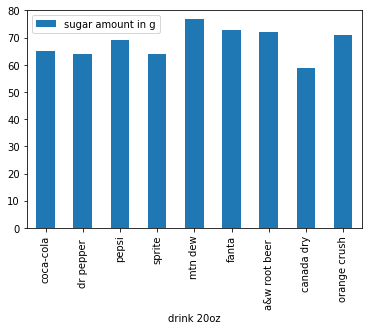

In [14]:
#Now, lets compare the sugar content
soda_nf.plot.bar(x='drink 20oz', y='sugar amount in g')

#gca = Get Current Axis
ax = matplotlib.pyplot.gca()

#limits the y axis to 80
ax.set_ylim([0,80])

(0.0, 310.0)

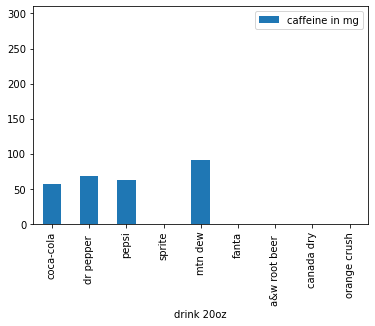

In [15]:
#What about the caffeine?
soda_nf.plot.bar(x='drink 20oz', y='caffeine in mg')

ax = matplotlib.pyplot.gca()

#setting the caffeine axis to the same limit will make it easier to compare 
ax.set_ylim([0,310])

## Energy Drinks

In [16]:
#merging the energy drinks
energy_nf = pd.merge(df3, df4)

In [17]:
energy_nf

,drink 16oz,sugar amount in g,caffeine in mg,sodium in mg,calories
0,monster energy,54,160,370,230
1,red bull,51,151,190,210
2,mtn dew kickstart grape,20,90,170,80
3,rockstar original,63,160,70,250
4,bang blue razz,0,300,40,0
5,full throttle,58,160,160,220
6,vuka renew mango peach,44,160,0,180


(0.0, 80.0)

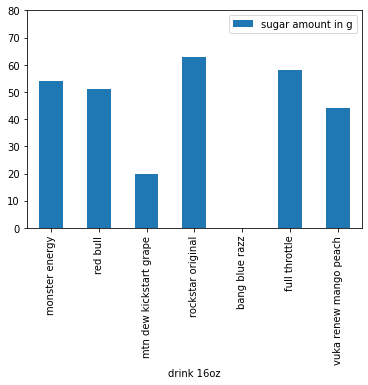

In [18]:
energy_nf.plot.bar(x='drink 16oz', y='sugar amount in g')
ax = matplotlib.pyplot.gca()
ax.set_ylim([0,80])

(0.0, 310.0)

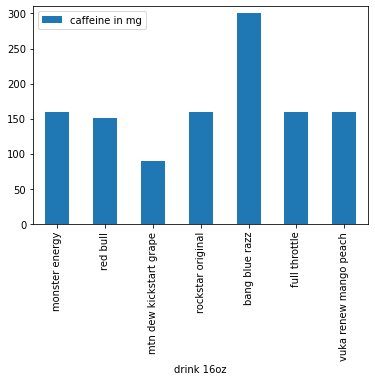

In [19]:
energy_nf.plot.bar(x='drink 16oz', y='caffeine in mg')
ax = matplotlib.pyplot.gca()

#caffeine axis limit
ax.set_ylim([0,310])

# Chapter 2 

In [20]:
#calling an API
import requests

In [21]:
#verification
payload = {"x-app-id": "", "x-app-key": ""}

In [22]:
r = requests.get("https://trackapi.nutritionix.com/v2/search/instant?query=body armor", headers=payload)

In [23]:
r

<Response [401]>

In [24]:
json=r.json()

In [25]:
#all data
json

{'message': 'unauthorized', 'id': '4d0fb1d3-c37e-44ab-89de-edf1e9add256'}

In [26]:
#A list of every key in a dictionary
json.keys()

dict_keys(['message', 'id'])

In [27]:
#I'm intrested in branded
json['branded']

KeyError: 'branded'

In [ ]:
#branded and common are list 
type(json['branded'])

In [ ]:
#They're dictionaries inside two list
type(json['branded'][0])

In [ ]:
#creating a Dataframe named 'bodyarmor'
bodyarmor = pd.DataFrame(json['branded'])

In [ ]:
bodyarmor

In [ ]:
#removing unnecessary index and columns
bodyarmor.drop(index=[1,8,16,18,19], columns=['serving_unit', 'nix_brand_id', 'brand_name_item_name', 'serving_qty', 'photo', 'brand_name', 'region', 'brand_type', 'nix_item_id', 'locale'], inplace=True)

## Bodyarmor

In [ ]:
bodyarmor

In [ ]:
bodyarmor.plot.barh('food_name', 'nf_calories', color="#444444")
matplotlib.pyplot.ylabel("drink")
matplotlib.pyplot.xlabel("calories")

In [ ]:
energy_nf.plot.barh('drink 16oz', 'calories')

In [ ]:
#Next step is to merge energy_nf and bodyarmor to compare calories

## Pre Merge

In [ ]:
energy_nf

In [ ]:
bodyarmor

In [ ]:
#droping unnecessary columns
energy_nf.drop(columns=['sugar amount in g', 'caffeine in mg', 'sodium in mg'], inplace=True)

In [ ]:
#renames colmns in bodyarmor
bodyarmor.columns = ['drink 16oz', 'calories']
bodyarmor.columns

In [ ]:
energy_nf

In [ ]:
bodyarmor

## The merge

In [ ]:
allcalories = [bodyarmor, energy_nf]

In [ ]:
result = pd.concat(allcalories)

In [ ]:
result

In [ ]:
result.plot.barh('drink 16oz', 'calories', color="#444444")

# This concludes my first data project, thank you for reading. Hopefully you learned something new today. - carlos s